In [269]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [270]:
N1, N2, N12, t = np.loadtxt("../data/coincidence_cs137.csv", delimiter=',', unpack=True, skiprows=1)

# N1 = unp.uarray(N1, np.sqrt(N1))
# N2 = unp.uarray(N2, np.sqrt(N2))
# N12 = unp.uarray(N12, np.sqrt(N12))
# t = unp.uarray(t, ERROR_TIME)

m1 = N1 / t
m2 = N2 / t
m12 = N12 / t

unique_t = np.unique(t)
print(unique_t)
avg_m1 = np.zeros(unique_t.shape)
avg_m2 = np.zeros(unique_t.shape)
avg_m12 = np.zeros(unique_t.shape)
for i, t_ in enumerate(unique_t):
    avg_m1[i] = np.mean(m1[t == t_])
    avg_m2[i] = np.mean(m2[t == t_])
    avg_m12[i] = np.mean(m12[t == t_])

print(avg_m1, avg_m2, avg_m12)


[ 10.   20.   50.   70.  100.  189.1 220.2 276.6 304.3]
[2598.6        2624.3125     2626.77       2623.85714286 2625.955
 2687.94817557 2686.71662125 2652.67172813 2624.93263227] [2480.05       2484.9        2477.89       2487.55357143 2486.935
 2448.12268641 2460.65849228 2475.18438178 2483.50640815] [13.075      12.975      13.785      13.33571429 13.5175     13.22580645
 13.6239782  13.38033261 13.14492277]


In [271]:
params, cov = np.polyfit(avg_m1[-4:]*avg_m2[-4:], avg_m12[-4:], 1, cov=True)

twotheta = params[0]

test_twotheta = avg_m12 / (avg_m1*avg_m2)
print(f'Unique measures {test_twotheta}')
# sigma_twotheta = pass
print(f'Fit: {twotheta}')

Unique measures [2.02881210e-06 1.98967847e-06 2.11788659e-06 2.04316600e-06
 2.06987760e-06 2.00987058e-06 2.06077575e-06 2.03786704e-06
 2.01639027e-06]
Fit: 4.597149963337926e-06


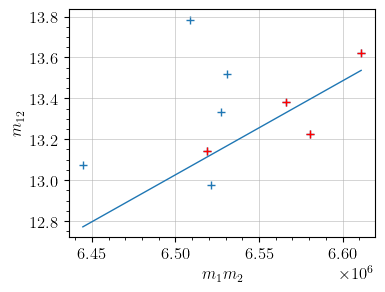

In [272]:
plt.xlabel('$m_1 m_2$')
plt.ylabel('$m_{12}$')
plt.scatter(avg_m1*avg_m2, avg_m12)
plt.scatter(avg_m1[-4:]*avg_m2[-4:], avg_m12[-4:], c='Red')
x = np.linspace(min(avg_m1*avg_m2), max(avg_m1*avg_m2), 200)
plt.plot(x, params[0]*x + params[1])